In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import cv2



In [1]:
def threshold(img):
    return np.where(img[:,:,2]>100,255,0)

In [2]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern =  np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return kern/kern.sum()

In [3]:
def computeR(image,scale,kappa):
    """ Array[n, m]*float*float->Array[n, m]
    """
    # compute the derivatives
    Ix = convolve2d(image, np.array([[-1, 0, 1]]), mode='same')
    Iy = convolve2d(image, np.array([[-1, 0, 1]]).T, mode='same')
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy
    # compute the gaussian kernel
    kern = gaussianKernel(scale)
    # compute the sum of the squares of the derivatives
    Sxx = convolve2d(Ixx, kern, mode='same')
    Syy = convolve2d(Iyy, kern, mode='same')
    Sxy = convolve2d(Ixy, kern, mode='same')
    # compute the R matrix
    R = (Sxx*Syy - Sxy**2) - kappa*(Sxx+Syy)**2
    return R

In [4]:
def rnms(image_harris,Rbin):
    """ Array[n, m] -> Array[n, m] 
    """
    # compute the size of the image
    n,m = image_harris.shape
    # create a new image
    image_rnms = np.zeros((n,m))
    # for each pixel
    for i in range(1,n-1):
        for j in range(1,m-1):
            # if the pixel is a local maximum,check if the pixel is the local maximum of its 8-neighborhood
            if Rbin[i,j] == 1 and np.max(image_harris[i-1:i+2, j-1:j+2]) == image_harris[i,j]:
                image_rnms[i,j] = 1
    return image_rnms

def cornerDetector(image, sigma, kappa, thres):
    """ Array[n, m]*float*float*float -> Array[n, m]
    """
    R = computeR(image, sigma, kappa)
    max,min=R.max(),R.min()
    Rnorm=(R-min)/(max-min)
    Rbin = thresholdR(Rnorm, thres)
    image_rnms = rnms(Rnorm, Rbin)
    return image_rnms

def thresholdR(R, thres):
    """ Array[n, m] * float -> Array[n, m]
    """
    return(np.where(R>thres, 1, 0))

In [5]:
def find_points(I1,I2,num,sigma=5,kappa=0.04,thres=0.3):
    test=threshold(I1)
    test1=threshold(I2)
    sub=test1-test
    pos=np.where(sub>0,0,255)
    neg=np.where(sub<0,0,255)
    image_rnms = cornerDetector(sub, sigma, kappa, thres)
    n2=int(np.ceil(3*sigma))
    x,y=np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    corners=np.argwhere(image_rnms==1)
    
    #plt.imshow(test,cmap='gray')
    #plt.scatter(corners[:,1],corners[:,0],s=2*n2-1,marker='o',edgecolors='r',facecolors='none')
    #plt.savefig('result/nid/{:>03d}.jpg'.format(num))
    return(corners)
   


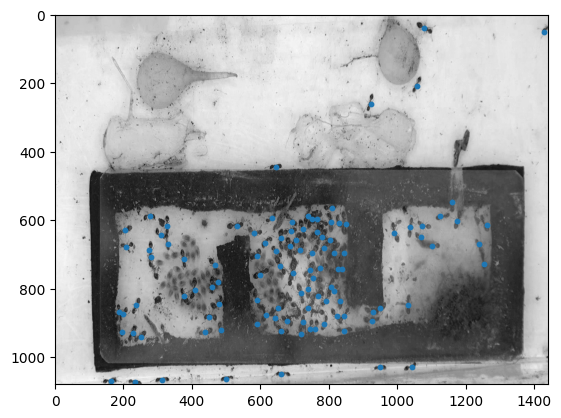

In [9]:
X=np.load('../recognition_img_fix/X_train.npy')
Y=np.load('../recognition_img_fix/Y_train.npy')
Y_x,Y_y=np.where(Y[0]==1)
plt.imshow(X[0][:,:,0].astype(int),cmap='gray')
plt.scatter(Y_y,Y_x,s=10)
plt.show()

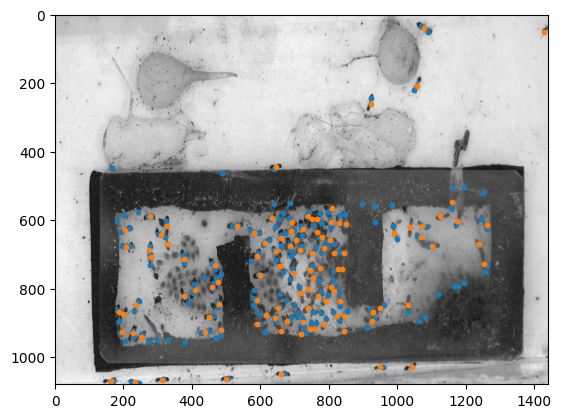

In [20]:
corners=find_points(np.zeros(X[0].shape),X[0],0)
plt.scatter(corners[:,1],corners[:,0],s=10)
plt.imshow(X[0][:,:,0].astype(int),cmap='gray')
plt.scatter(Y_y,Y_x,s=10)
plt.show()

In [53]:
YY=np.array([[Y_x[i],Y_y[i]] for i in range(len(Y_y))])


array([  39, 1077])

In [56]:
YY=YY.astype(float)
corners=corners.astype(float)

In [66]:
List_b

[array([  34., 1068.]),
 array([ 219., 1049.]),
 array([242., 924.]),
 array([450., 639.]),
 array([ 564., 1157.]),
 array([577., 798.]),
 array([577., 743.]),
 array([588., 272.]),
 array([596., 631.]),
 array([589., 737.]),
 array([601., 773.]),
 array([ 612., 1172.]),
 array([595., 684.]),
 array([598., 804.]),
 array([614., 846.]),
 array([614., 846.]),
 array([ 626., 1262.]),
 array([613., 534.]),
 array([ 619., 1084.]),
 array([602., 325.]),
 array([616., 718.]),
 array([623., 219.]),
 array([629., 697.]),
 array([648., 775.]),
 array([628., 569.]),
 array([618., 988.]),
 array([640., 302.]),
 array([648., 775.]),
 array([ 646., 1057.]),
 array([636., 672.]),
 array([656., 703.]),
 array([661., 807.]),
 array([658., 624.]),
 array([ 675., 1092.]),
 array([671., 688.]),
 array([674., 220.]),
 array([673., 791.]),
 array([676., 720.]),
 array([676., 279.]),
 array([686., 639.]),
 array([693., 834.]),
 array([695., 593.]),
 array([700., 279.]),
 array([703., 374.]),
 array([ 734., 1

In [64]:
List_a=[]
List_b=[]
count=0
for ppt in YY:
    for pts in corners:
        if np.linalg.norm(ppt-pts)<20:
            List_a.append(ppt)
            List_b.append(pts)
            count+=1
            break


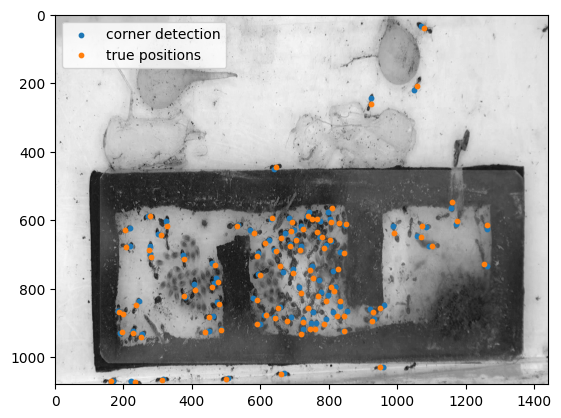

In [69]:
List_a,List_b=np.array(List_a),np.array(List_b)
plt.scatter(List_b[:,1],List_b[:,0],s=10,label='corner detection')
plt.scatter(List_a[:,1],List_a[:,0],s=10, label='true positions')
plt.imshow(X[0][:,:,0].astype(int),cmap='gray')
plt.legend()
plt.show()

In [63]:
count

96

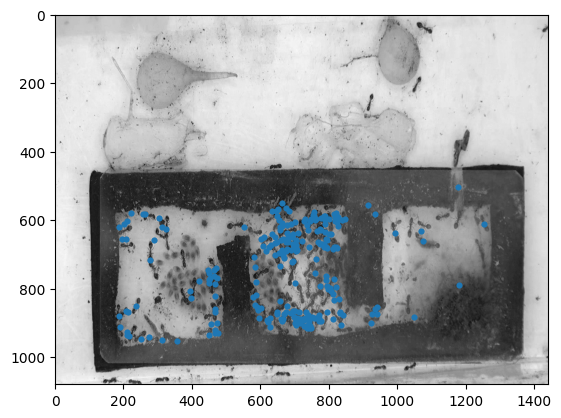

In [25]:
plt.scatter(lines[:,1],lines[:,0],s=10)
plt.imshow(X[0][:,:,0].astype(int),cmap='gray')
plt.show()

In [16]:
len(corners)

128

In [17]:
len(Y_x)

109

In [14]:
data_matrix = np.load('extract/nid/extact_matrix.npy', allow_pickle=True)

In [ ]:
for corner in corners:
    

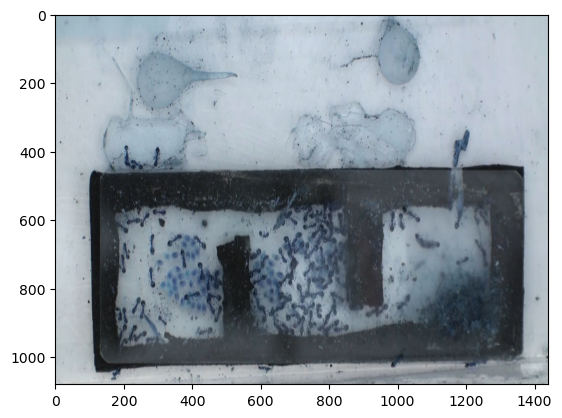

In [16]:
plt.imshow(threshold(data_matrix[0]))

In [27]:
points_matrix=[]
for i in range(100):
    print('第',i, '張圖')
    corners=find_points(data_matrix[i],data_matrix[i+1],i)
    points_matrix.append(corners)
points_matrix=np.array(points_matrix)
np.save('result/nid/100.npy',points_matrix)

第 0 張圖
第 1 張圖
第 2 張圖
第 3 張圖
第 4 張圖
第 5 張圖
第 6 張圖
第 7 張圖
第 8 張圖
第 9 張圖
第 10 張圖
第 11 張圖
第 12 張圖
第 13 張圖
第 14 張圖
第 15 張圖
第 16 張圖
第 17 張圖
第 18 張圖
第 19 張圖
第 20 張圖
第 21 張圖
第 22 張圖
第 23 張圖
第 24 張圖
第 25 張圖
第 26 張圖
第 27 張圖
第 28 張圖
第 29 張圖
第 30 張圖
第 31 張圖
第 32 張圖
第 33 張圖
第 34 張圖
第 35 張圖
第 36 張圖
第 37 張圖
第 38 張圖
第 39 張圖
第 40 張圖
第 41 張圖
第 42 張圖
第 43 張圖
第 44 張圖
第 45 張圖
第 46 張圖
第 47 張圖
第 48 張圖
第 49 張圖
第 50 張圖
第 51 張圖
第 52 張圖
第 53 張圖
第 54 張圖
第 55 張圖
第 56 張圖
第 57 張圖
第 58 張圖
第 59 張圖
第 60 張圖
第 61 張圖
第 62 張圖
第 63 張圖
第 64 張圖
第 65 張圖
第 66 張圖
第 67 張圖
第 68 張圖
第 69 張圖
第 70 張圖
第 71 張圖
第 72 張圖
第 73 張圖
第 74 張圖
第 75 張圖
第 76 張圖
第 77 張圖
第 78 張圖
第 79 張圖
第 80 張圖
第 81 張圖
第 82 張圖
第 83 張圖
第 84 張圖
第 85 張圖
第 86 張圖
第 87 張圖
第 88 張圖
第 89 張圖
第 90 張圖
第 91 張圖
第 92 張圖
第 93 張圖
第 94 張圖
第 95 張圖
第 96 張圖
第 97 張圖
第 98 張圖
第 99 張圖


/var/folders/2r/9qy6_yrj3hz_h1xfq66mhfl80000gn/T/ipykernel_32901/2886689446.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points_matrix=np.array(points_matrix)


In [30]:
points_matrix=np.load('result/nid/100.npy', allow_pickle=True)
points_matrix.shape

(100,)

In [ ]:
points_matrix=[]
for k in range(1,7):
    print('第',k, '组图')
    for i in range(100*k,100*(k+1)):
        corners=find_points(data_matrix[i],data_matrix[i+1],i)
        points_matrix.append(corners)
    points_matrix=np.array(points_matrix)
    np.save('result/nid/{}00.npy'.format(str(k+1)),points_matrix)

In [ ]:
points_matrix=[]
for k in range(7,15):
    print('第',k, '组图')
    for i in range(100*k,100*(k+1)):
        corners=find_points(data_matrix[i],data_matrix[i+1],i)
        points_matrix.append(corners)
    points_matrix=np.array(points_matrix)
    np.save('result/nid/{}00.npy'.format(str(k+1)),points_matrix)

In [2]:
fourmis_pos=np.load('result/nid/location_dectection.npy')
fourmis_pos[0]

NameError: name 'np' is not defined